In [71]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [72]:
 import	pandas	as	pd
 import	numpy	as	np
 import	matplotlib.pyplot	as	plt
 import	seaborn	as	sns
 from	sklearn.model_selection	import	train_test_split,	GridSearchCV
 from	sklearn.ensemble	import	RandomForestRegressor
 from	sklearn.model_selection	import	train_test_split
 from	sklearn.linear_model	import	LinearRegression,	Ridge,	Lasso
 from	sklearn.tree	import	DecisionTreeRegressor
 from	sklearn.metrics	import	mean_squared_error,	r2_score,	mean_absolute_error

In [73]:
#Importing	the	data
df=pd.read_csv(r"C:\Users\HP\Downloads\Salary Data.csv",header=0)

In [74]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [77]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [78]:
# Remove rows with missing values which can cause errors
df.dropna(inplace=True)

In [79]:
# Remove any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

Encoding Categorial Columns


Gender

0:Male  1:Female

Education
"Bachelor's": 0, "Master's": 1, "PhD": 2

In [80]:
# Define the mapping for Education Level
education_map = {"Bachelor's": 0, "Master's": 1, "PhD": 2}

# Define the mapping for Gender
gender_map = {'Male': 0, 'Female': 1}


In [81]:
# Apply the mapping to the columns
df['Education Level'] = df['Education Level'].map(education_map)
df['Gender'] = df['Gender'].map(gender_map)

In [82]:
# --- Display the results ---
print("Dataset after encoding:")
print(df.head())

Dataset after encoding:
    Age  Gender  Education Level          Job Title  Years of Experience  \
0  32.0       0                0  Software Engineer                  5.0   
1  28.0       1                1       Data Analyst                  3.0   
2  45.0       0                2     Senior Manager                 15.0   
3  36.0       1                0    Sales Associate                  7.0   
4  52.0       0                1           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [83]:
# We select the columns we want to use to make predictions
features = ['Years of Experience', 'Education Level', 'Gender']
X = df[features]
y = df['Salary'] # This is what we want to predict


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LinearRegression


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Initialize the model
linear_model = LinearRegression()

# 2. Train the model
linear_model.fit(X_train, y_train)

# 3. Make predictions and evaluate
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("--- Linear Regression Results ---")
print(f"R-squared: {r2_linear:.3f}")
print(f"Mean Absolute Error: ${mae_linear:,.2f}")

--- Linear Regression Results ---
R-squared: 0.913
Mean Absolute Error: $10,362.67


Random Forest Regressor


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("\n--- Random Forest Regressor Results ---")
print(f"R-squared: {r2_rf:.3f}")
print(f"Mean Absolute Error: ${mae_rf:,.2f}")


--- Random Forest Regressor Results ---
R-squared: 0.895
Mean Absolute Error: $10,217.87


Gradient Boosting Regressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# 2. Train the model
gb_model.fit(X_train, y_train)

# 3. Make predictions and evaluate
y_pred_gb = gb_model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("\n--- Gradient Boosting Regressor Results ---")
print(f"R-squared: {r2_gb:.3f}")
print(f"Mean Absolute Error: ${mae_gb:,.2f}")


--- Gradient Boosting Regressor Results ---
R-squared: 0.903
Mean Absolute Error: $10,101.66


Support Vector Regressor (SVR)

In [88]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Initialize the model
svr_model = SVR()

# 2. Train the model
svr_model.fit(X_train, y_train)

# 3. Make predictions and evaluate
y_pred_svr = svr_model.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("\n--- Support Vector Regressor (SVR) Results ---")
print(f"R-squared: {r2_svr:.3f}")
print(f"Mean Absolute Error: ${mae_svr:,.2f}")


--- Support Vector Regressor (SVR) Results ---
R-squared: -0.021
Mean Absolute Error: $40,479.08


In [89]:
# 1. Create a dictionary with the results from your individual model runs
model_comparison_data = {
    'R-squared': [r2_linear, r2_rf, r2_gb, r2_svr],
    'Mean Absolute Error': [mae_linear, mae_rf, mae_gb, mae_svr]
}

# 2. Create a pandas DataFrame for easy viewing
comparison_df = pd.DataFrame(model_comparison_data, 
                             index=['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR'])

# 3. Sort the results to find the best model easily
# We sort by R-squared in descending order (highest is best)
sorted_comparison_df = comparison_df.sort_values(by='R-squared', ascending=False)


# 4. Print the final comparison table
print("--- Final Model Performance Comparison ---")
print(sorted_comparison_df)

--- Final Model Performance Comparison ---
                   R-squared  Mean Absolute Error
Linear Regression   0.913297         10362.671441
Gradient Boosting   0.903006         10101.659664
Random Forest       0.894510         10217.869586
SVR                -0.020768         40479.076482


To find the best one, look for:

Highest R-squared: The model at the top of the table has the highest R-squared value, meaning it best explains the patterns in your salary data.

Lowest Mean Absolute Error: Compare the MAE values. The model with the lowest error is, on average, the most accurate in its predictions.

In [90]:
# The best model is the first one in the index of the sorted DataFrame
best_model_name = sorted_comparison_df.index[0]
best_model_stats = sorted_comparison_df.iloc[0] # Get its stats

print("--- Final Model Performance Comparison ---")
print(sorted_comparison_df)
print("\n" + "="*40)
print(f"🏆 The best performing model is: {best_model_name}")
print(f"   - R-squared: {best_model_stats['R-squared']:.3f}")
print(f"   - Mean Absolute Error: ${best_model_stats['Mean Absolute Error']:,.2f}")
print("="*40)

--- Final Model Performance Comparison ---
                   R-squared  Mean Absolute Error
Linear Regression   0.913297         10362.671441
Gradient Boosting   0.903006         10101.659664
Random Forest       0.894510         10217.869586
SVR                -0.020768         40479.076482

🏆 The best performing model is: Linear Regression
   - R-squared: 0.913
   - Mean Absolute Error: $10,362.67


Salary Distribution
A histogram shows the distribution of the Salary column. It helps you see if the data is symmetric or skewed and identify the most common salary ranges.

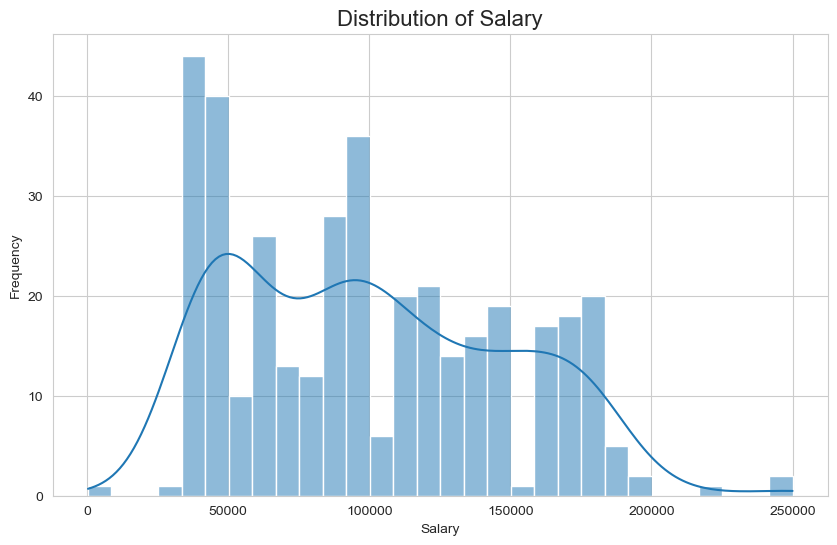

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create a histogram of the Salary column
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True, bins=30)
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Salary by Education Level
A box plot is perfect for comparing the salary ranges across different categories, like Education Level.

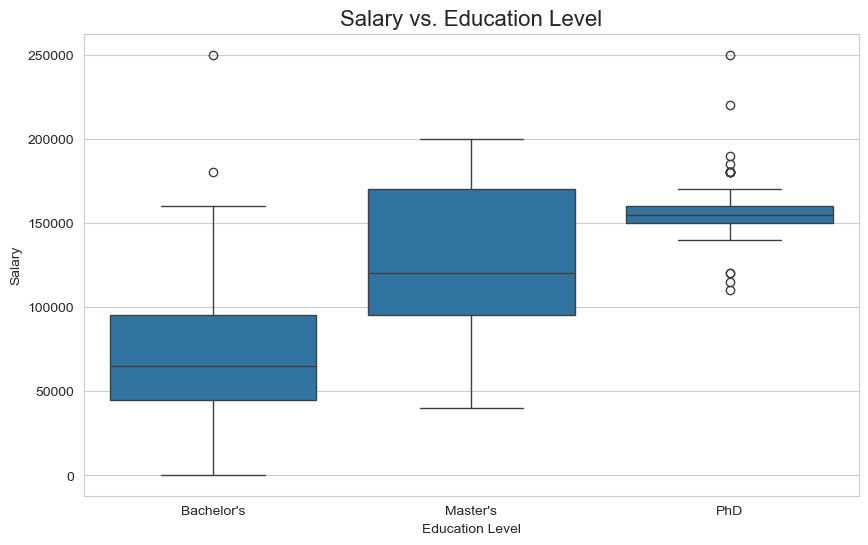

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to compare Salary across Education Levels
plt.figure(figsize=(10, 6))
# Note: We use the original dataframe 'df' before it was numerically encoded for easier-to-read labels
original_df = pd.read_csv(r"C:\Users\HP\Downloads\Salary Data.csv",header=0)
original_df.dropna(inplace=True)
sns.boxplot(x='Education Level', y='Salary', data=original_df, order=["Bachelor's", "Master's", "PhD"])
plt.title('Salary vs. Education Level', fontsize=16)
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

Actual vs. Predicted Values
This is one of the most important plots. It shows how close your model's predictions are to the actual truth. In a perfect model, all points would fall on the 45-degree diagonal line.

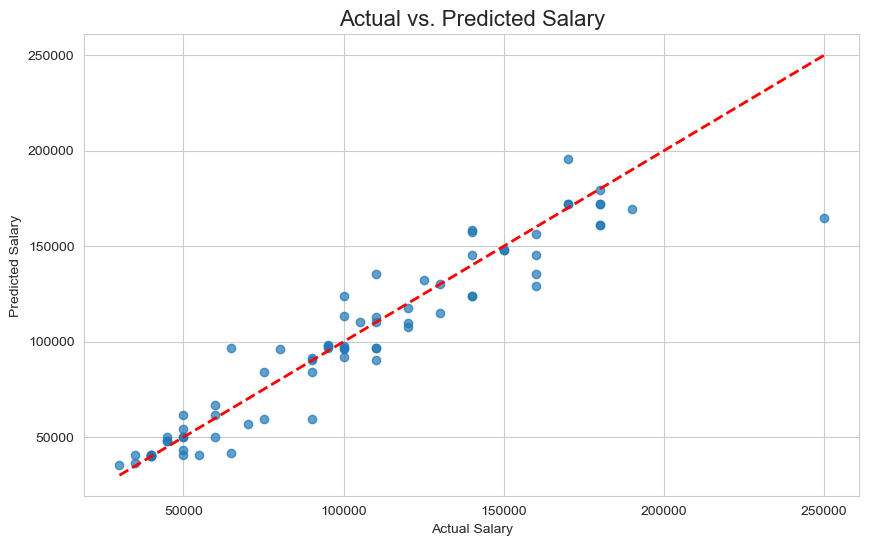

In [93]:
# This code assumes you have already trained your best model (e.g., rf_model)
# and have y_test and y_pred_rf available.

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)

# Add a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('Actual vs. Predicted Salary', fontsize=16)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

Residuals Plot
A residuals plot helps you check the assumptions of your regression model. It plots the errors (Actual - Predicted) against the predicted values. A good model will have residuals randomly scattered around the zero line with no obvious pattern.

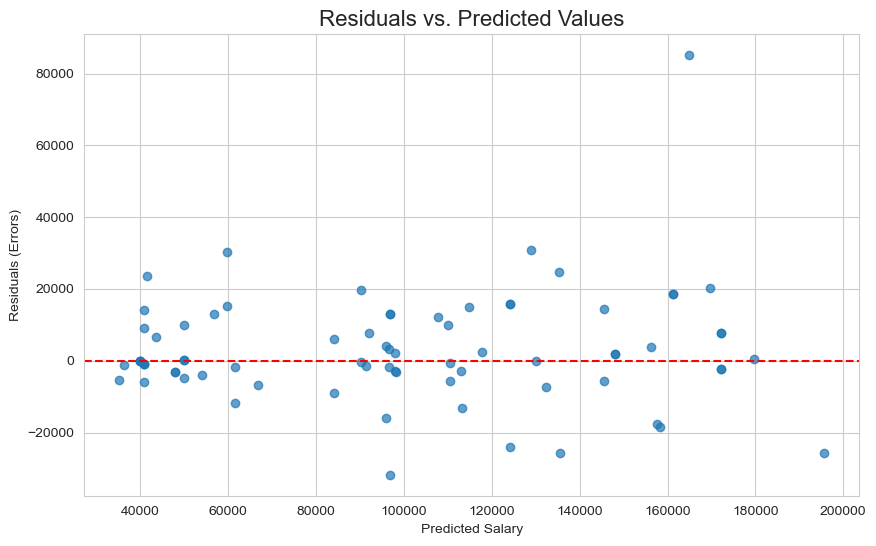

In [94]:
# Calculate the residuals (the errors)
residuals = y_test - y_pred_rf

# Create the residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.7)

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals (Errors)')
plt.show()